In [1]:
# Run this cell first. This import should ideally
# happen automatically in our final setup.
from dstaster import * 

As before, we first load our dataset.

In [2]:
collection = pd.read_csv("../tate/paintings.csv", index_col=0)
collection.head() # Returns the first five rows

,artist,title,year,groundtruth,height,width
T13896,John Constable,Salisbury Cathedral from the Meadows,1831,L,1537,1920
T05010,Pablo Picasso,Weeping Woman,1937,O,608,500
N05915,Pablo Picasso,Bust of a Woman,1909,P,727,600
N00530,Joseph Mallord William Turner,Snow Storm - Steam-Boat off a Harbour’s Mouth,1842,L,914,1219
T00598,Richard Dadd,The Fairy Feller’s Master-Stroke,1855,O,540,394



<h2>Plotting with <code>matplotlib</code></h2>

Matplotlib is a powerful plotting library which allows us to
generate many kinds of visualizations using Python code. Before we see how this plotting works, we need to learn a little bit about the terminology which this library uses.

The following graphic contains labels for all important elements of a Matplotlib plot. Importantly, a <em>figure</em> describes a single Matplotlib output which can contain any number of plots. Each plot is represented by its <em>axes</em> which represent a coordinate system in which can draw.

<img style="margin-top:-ex" src="images/matplotlib.png"/>

Most of the action happens with the axes object. We only need access to the figure object for high-level layout and to write the plot to a file. Let us generate a plot similar to the image above and see how the code builds up the plot step by step.

To begin, we need to tell the Matplotlib library (which we import under the name `plt`) that we want to create new figure. This is done using the `.subplots()` method which creates a figure and any number of axes (by default just one) and returns these objects.

Jupyter notebook has some built-in magic which automatically displays our plot directly in the output of the cell, so if you run the code below you should see an empty plot.

<div class="note">
    We additionally pass two parameters to <code>subplots</code>
    which control the shape of the figure (<code>figsize</code>) 
    and the scale at which it is drawn on your screen (<code>dpi</code>). If the text in the plot appears to small on your screen, try increasing the dpi value to 300.
</div>

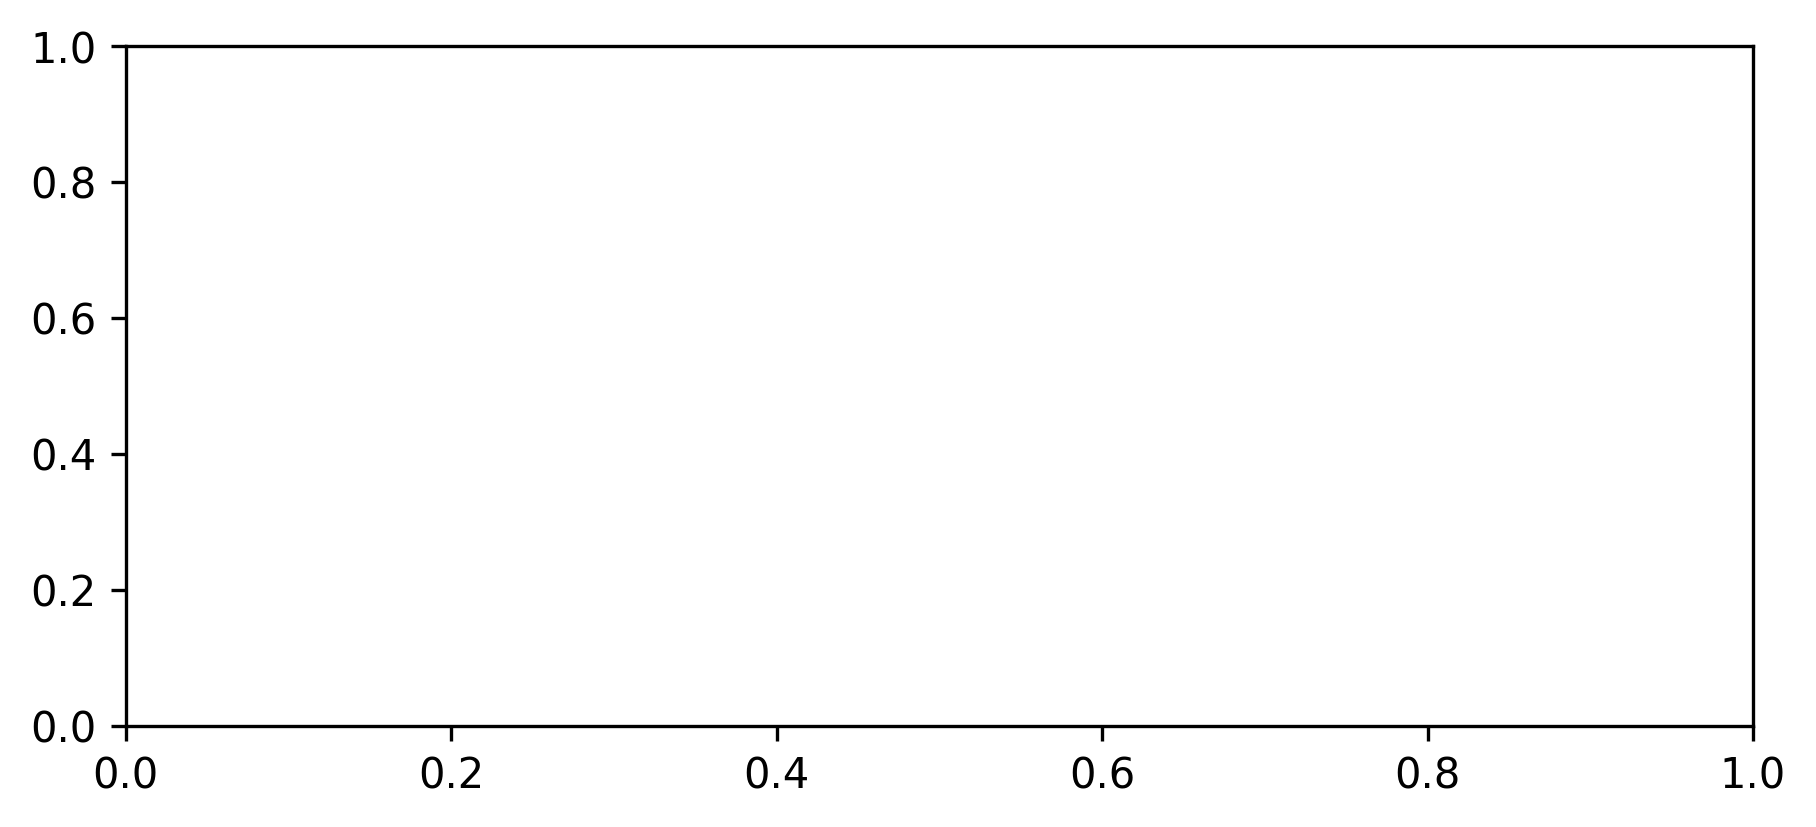

In [3]:
fig, ax = plt.subplots(dpi=300, figsize=(7,3))

<h2>Histograms</h2>

Let's say we would like to learn more about the 'year' column in our dataset. As we saw in the previous notebook, we can access the column and compute various statistics:

In [4]:
collection['year'].describe()

count    2158.000000
mean     1873.828082
std        76.739168
min      1594.000000
25%      1824.000000
50%      1889.500000
75%      1934.000000
max      2017.000000
Name: year, dtype: float64

However, each statistic is by design a very start simplification of the whole dataset. Sometimes, we simply have to <em>look</em> at the data. We already talked about histograms plots. Before we go into details of how we can use `pandas` and `matplotlib`, let us recall the basic ingredients of a histogram plot: a histogram divides the possible range of values into <em>bins</em>. For each bin, we count how many values fall into its range and then draw a rectangle on top of the bin whose height corresponds to this count and whose width covers the range of the bin.

The width of the bins determines the granularity at which we look at our data. If the width is very small, we have very little aggregation which creates an often very noisy plot. If the width is very high, we aggregate a lot of data and run the risk of oversimplifying. 


If you run the following cell you will be able to adjust
the bin width of a histogram plot using a slider. Change the value and see how it affects the shape of the resulting 
distribution.

<div class="note">We have hidden the source code for this part since it contains a lot of advanced features. If you are curious, you can have a look by pressing the 'Show code' button below it. You can still run this cell as normal!</div>

In [5]:
from ipywidgets import *
import ipywidgets as widgets

try:
    # Tests a) that the variable is defined and b) that it's not None
    if collection is None: 
        raise NameError
except NameError:
    error("<code>collection</code> undefined.",
          "Did you run the code cells above?")

def plot_hist(bin_size):
    fig, ax = plt.subplots(dpi=300, figsize=(7,3.5))
    ax.hist(collection['year'], bins=range(1550,2051,bin_size), color=colors['blue'])
    ax.set_title('Number of paintings in Tate collection')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of paintings')
    
config = {
    'continuous_update': False,
    'min': 1,
    'value': 10,
    'max': 100
}

layout = {
    'width': '70%',
}

slider = widgets.IntSlider(**config, layout=layout, description="Bin size")
interact(plot_hist, bin_size=slider)

pass

interactive(children=(IntSlider(value=10, continuous_update=False, description='Bin size', layout=Layout(width…

<div class="task">
    <div class="no">1</div>
    <div class="text">
        Use the interactive plot <b>above</b> to look at the distribution
        for bin width 5, 25 and 100. For each width, count how
        many peaks (point where the plot goes up and then down) 
        the distribution has. Which answer do you think is the &lsquo;correct&rsquo; answer? Discuss with your peers!
    </div>
</div>

<div class="task">
    <div class="no">2</div>
    <div class="text">
        The cell <b>below</b> plots the same histogram as the interactive plot above. Try changing the parameter <code>bins=...</code>. How does that change the plot?
    </div>
</div>

Text(0, 0.5, 'Number of paintings')

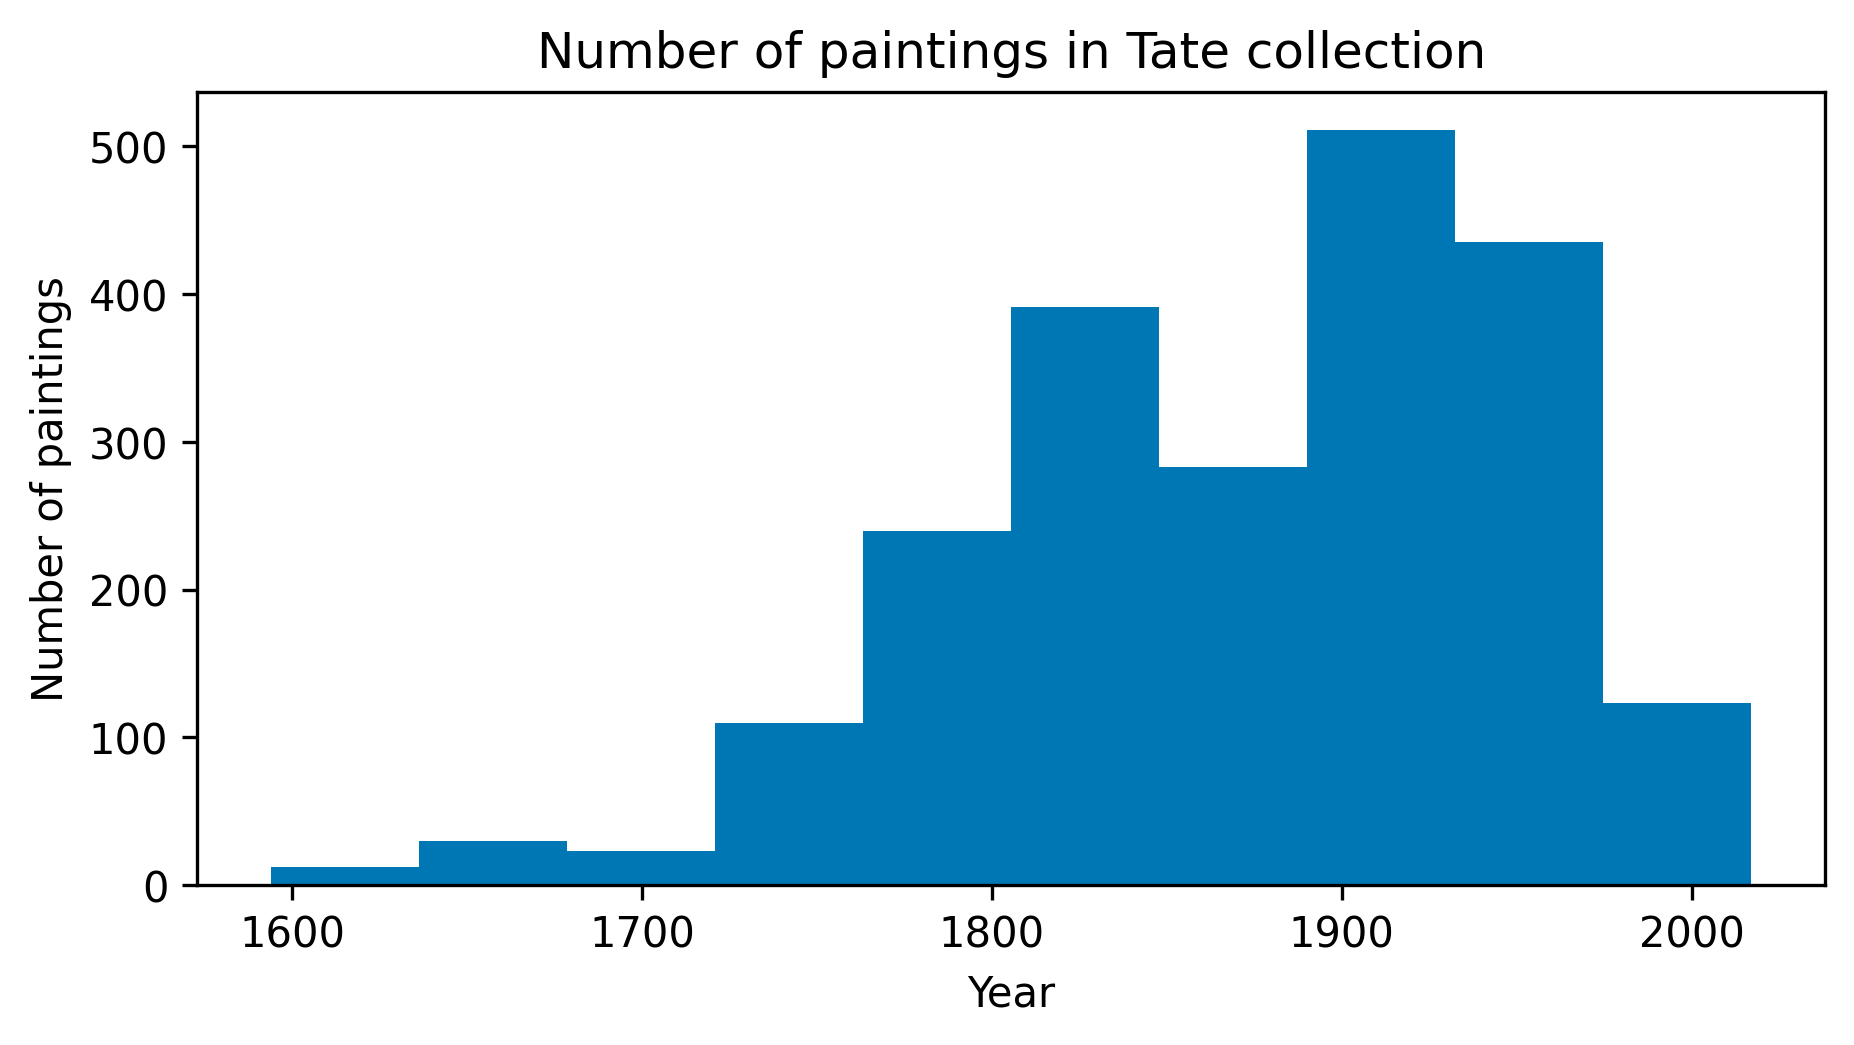

In [6]:
fig, ax = plt.subplots(dpi=300, figsize=(7,3.5))
ax.hist(collection['year'], bins=10)
ax.set_title('Number of paintings in Tate collection')
ax.set_xlabel('Year')
ax.set_ylabel('Number of paintings')
    

<h2>Scatter plots</h2>

If we want to compare the relationship of two quantities to each other, histograms are of little help: they can show us how the individual quantities are distributed, but not how they <i>interrelate</i>. A basic but highly useful plot for this type of data analysis is a <b>scatter plot</b>: we simply plot every pair of values in an x/y-coordinate system.

Let's see how we can reproduce the scatter plot of width vs height from the current activity:

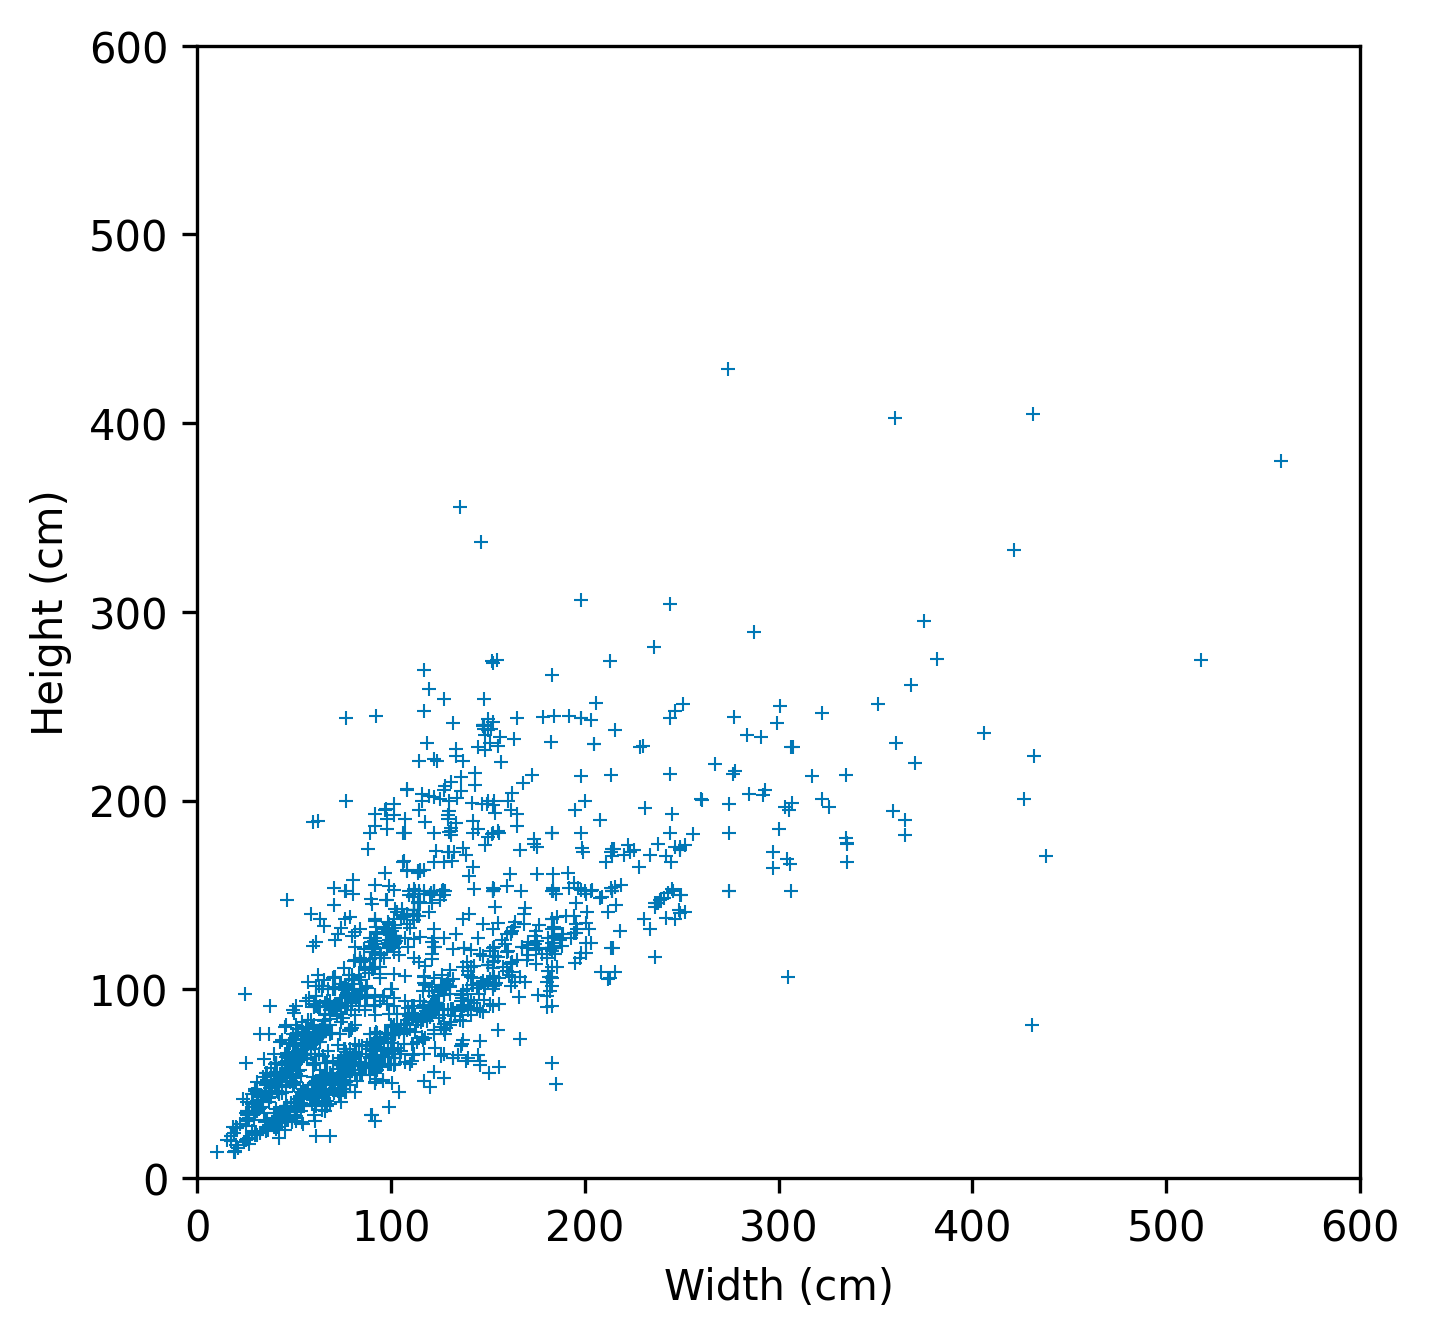

In [58]:
fig, ax = plt.subplots(dpi=300, figsize=(5,5))
xs = collection['width'] / 10   # Convert to cm
ys = collection['height'] / 10  # Convert to cm
ax.scatter(xs, ys, marker='+', s=10, lw=.5)
ax.set_xlim(0, 600)
ax.set_ylim(0, 600)

ax.set_xlabel('Width (cm)')
ax.set_ylabel('Height (cm)')
pass

With a bit of work we can also add the histograms of the individual variables to the scatter plot. This goes beyond what we learn in this course, but it neatly shows how these two plot types relate to each other:

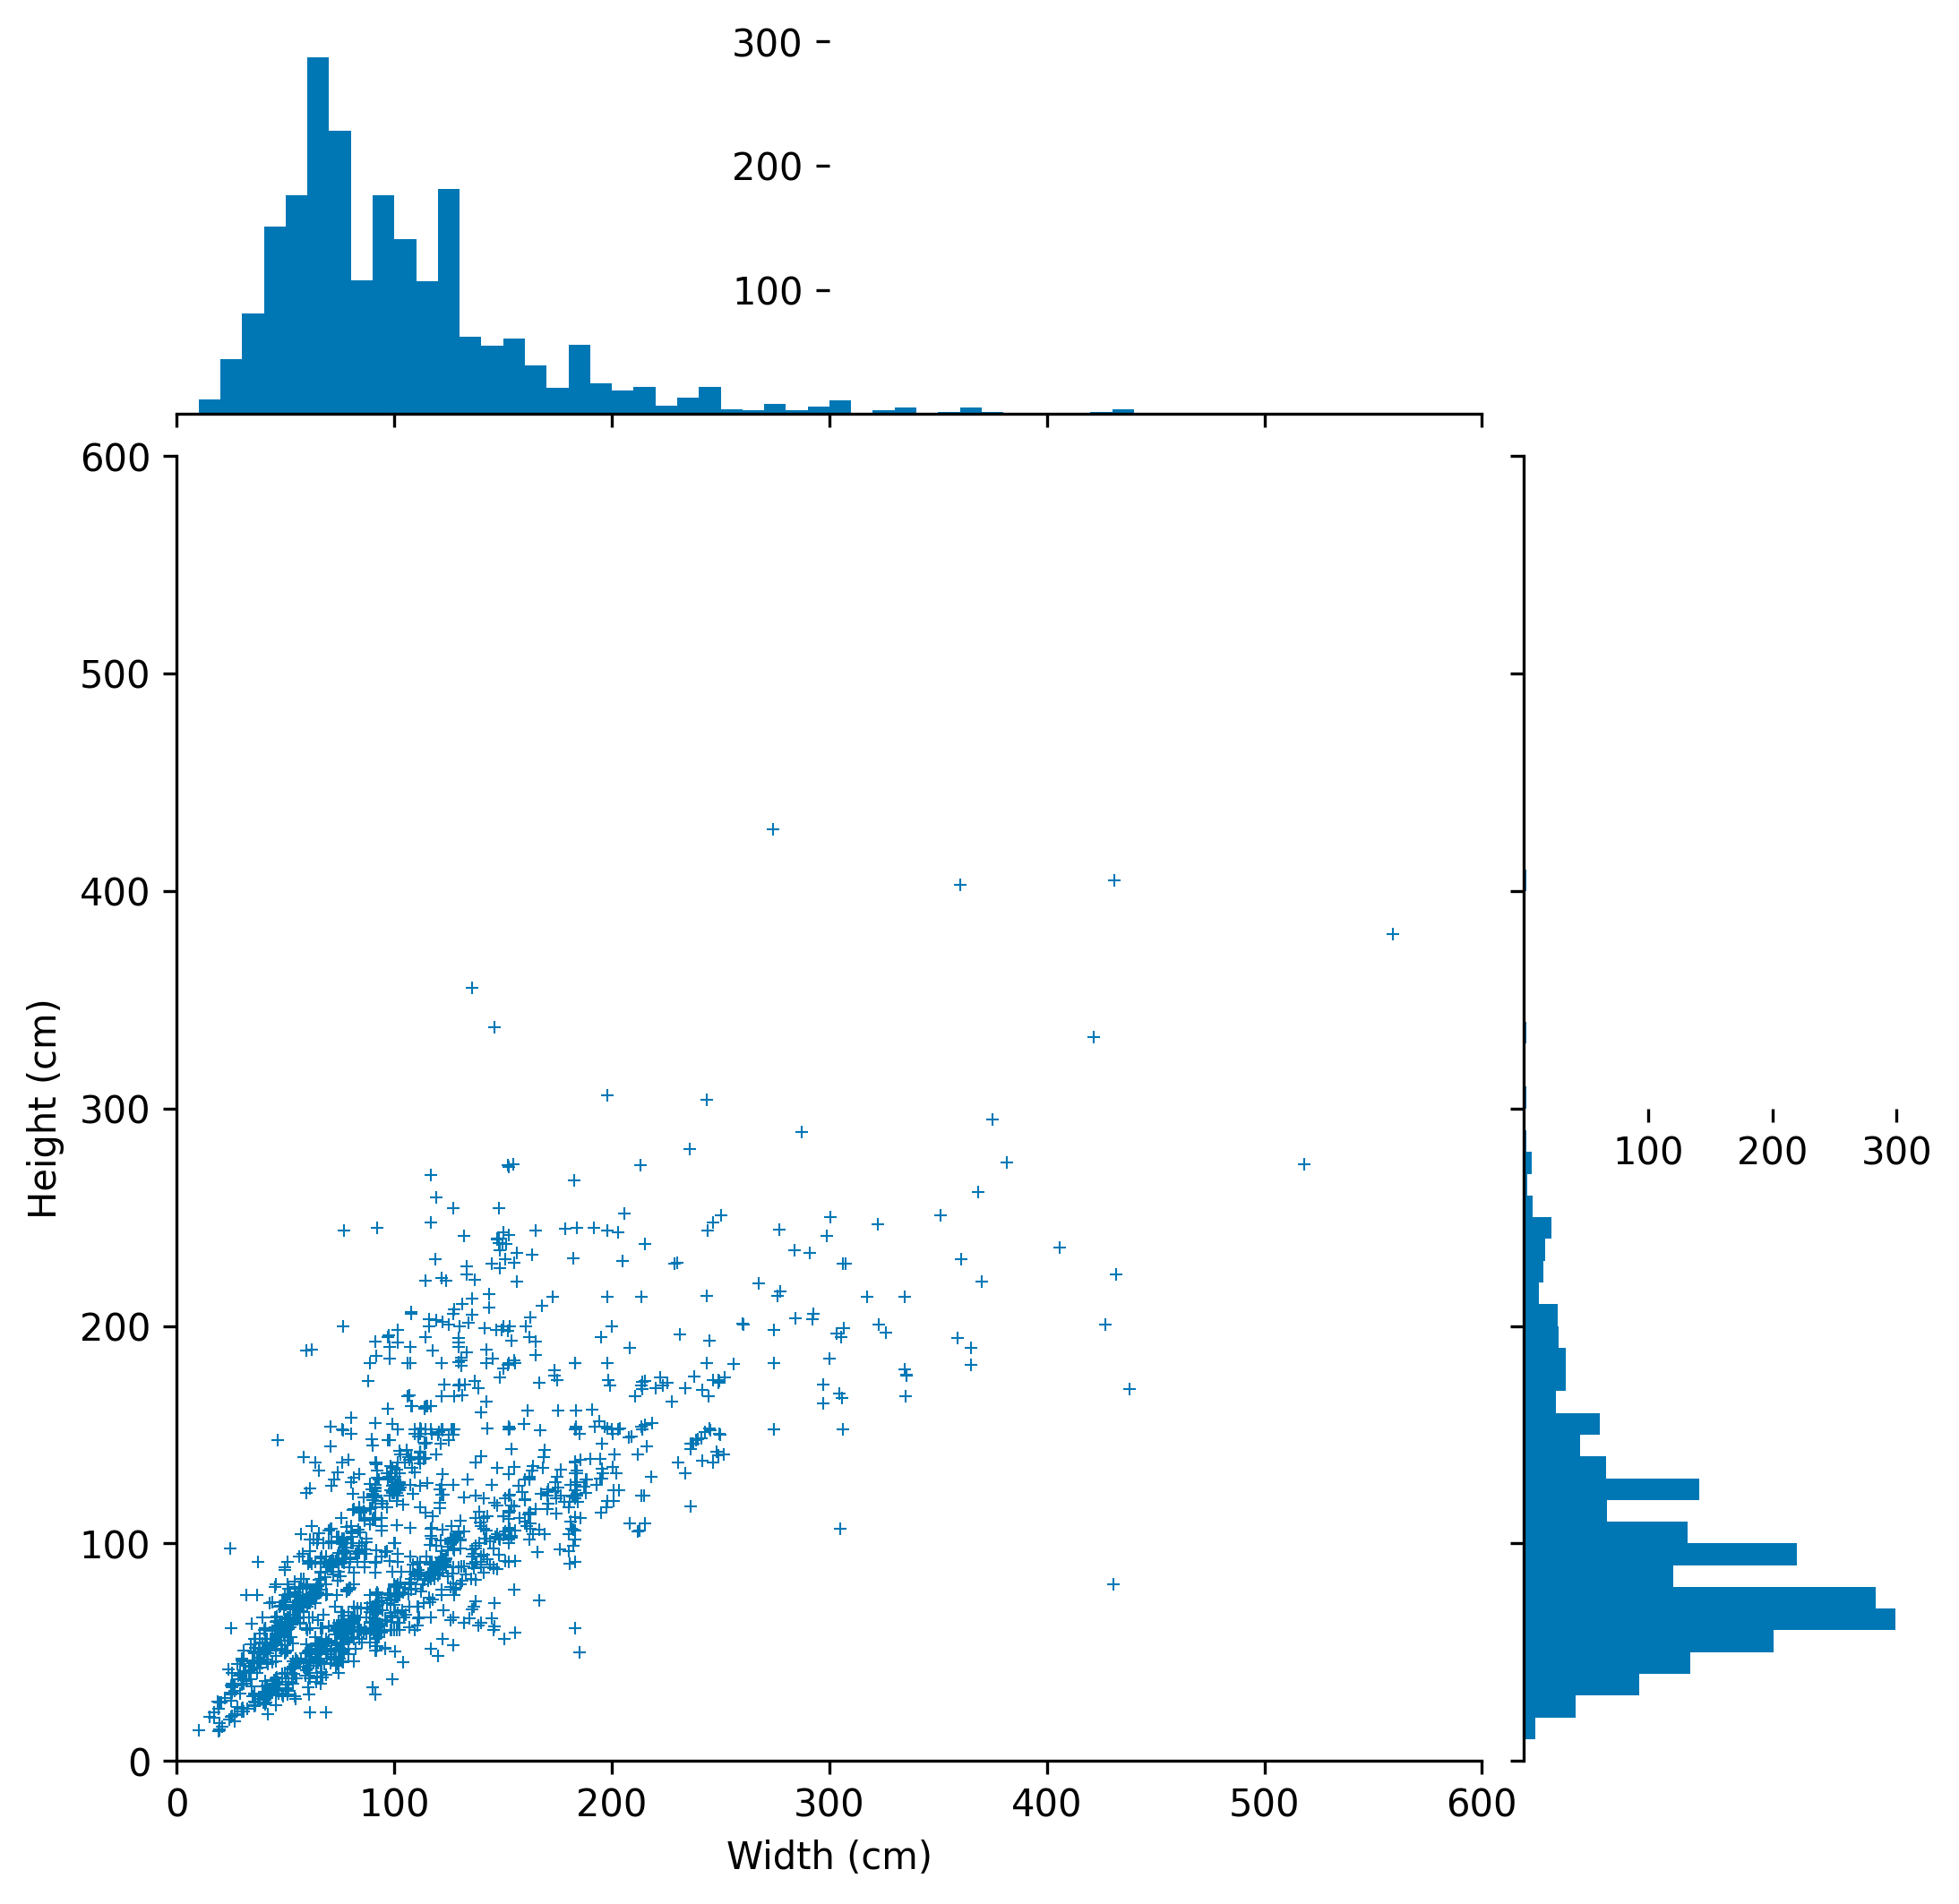

In [61]:
# start with a square Figure
fig = plt.figure(dpi=300, figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)


xs = collection['width'] / 10
ys = collection['height'] / 10

ax.scatter(xs, ys, marker='+', s=10, lw=.5)
ax.set_xlim(0, 600)
ax.set_ylim(0, 600)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Width (cm)')
ax.set_ylabel('Height (cm)')


ax_histx.hist(xs, bins=range(0,601,10))
ax_histy.hist(ys, bins=range(0,601,10), orientation='horizontal')

ax_histx.spines['top'].set_visible(False)
ax_histx.spines['left'].set_visible(False)
ax_histx.spines['right'].set_visible(False)
ax_histx.set_ylim(0, 300)
ax_histx.set_yticks(range(100, 301, 100))
ax_histx.spines['left'].set_position(('axes', .5))


ax_histy.spines['top'].set_visible(False)
ax_histy.spines['right'].set_visible(False)
ax_histy.spines['bottom'].set_visible(False)
ax_histy.set_xlim(0, 300)
ax_histy.set_xticks(range(100, 301, 100))
ax_histy.spines['bottom'].set_position(('axes', .5))

pass

<h2>Bar charts</h2>

Bar charts are useful to compare quantities to each other. For example, let's see which painters are most represented in our dataset. We can to this by calling the method `value_counts` of the the &lsquo;artist&rsquo; column in `collection`. This will return a pandas series where the index contains all artists what we find in `collection['artist']` and the values correspond to the number of times teach artist appears. The series is further sorted by these counts, so the first artist in the series has the highest count and the last artist has the lowest count.

In order to keep things simple, we select the ten first values from the series which correspond to the ten artists that appear most often in our dataset.

In [9]:
counts = collection['artist'].value_counts()
counts = counts[:10] # Select ten values with highest counts
counts

Joseph Mallord William Turner    240
John Constable                    34
John Singer Sargent               32
Sir Joshua Reynolds               30
Thomas Gainsborough               25
George Frederic Watts             22
Walter Richard Sickert            21
Philip Wilson Steer               20
Augustus John OM                  18
Richard Wilson                    18
Name: artist, dtype: int64

These numbers happen to be relatively easy to interpret, but a visual representation as a bar chart really drives home how many paintings of William Turner the Tate collection contains:

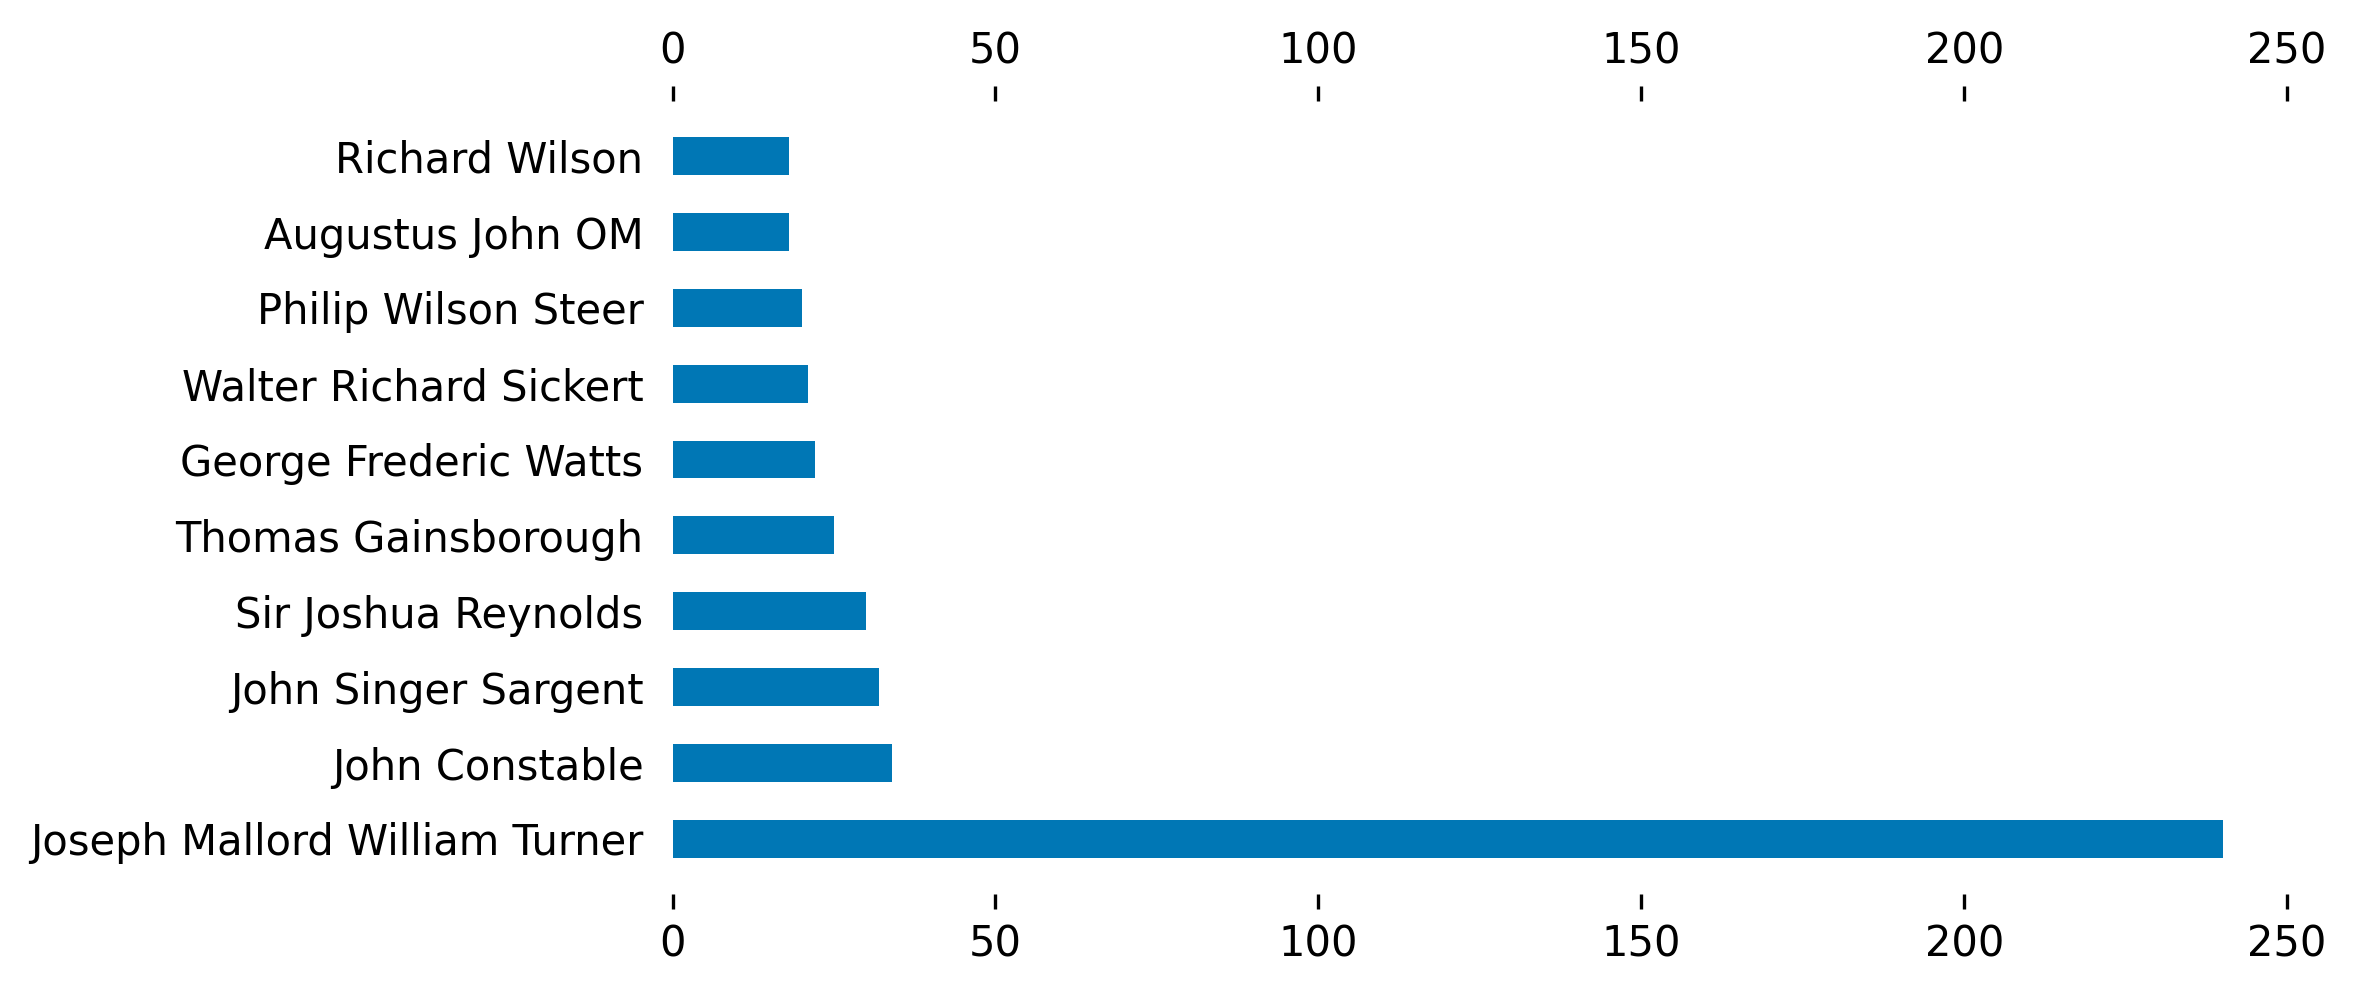

In [10]:
fig, ax = plt.subplots(dpi=300, figsize=(7,3.5))
ax.barh(counts.index, counts.values, height=.5)

# Some chart options to make it look nice
for s in ax.spines:
    ax.spines[s].set_visible(False)
ax.tick_params(axis='y', which='both', left=False)
ax.tick_params(axis='x', which='both', top=True, labeltop=True)
pass

<h2>Other visualisations</h2>

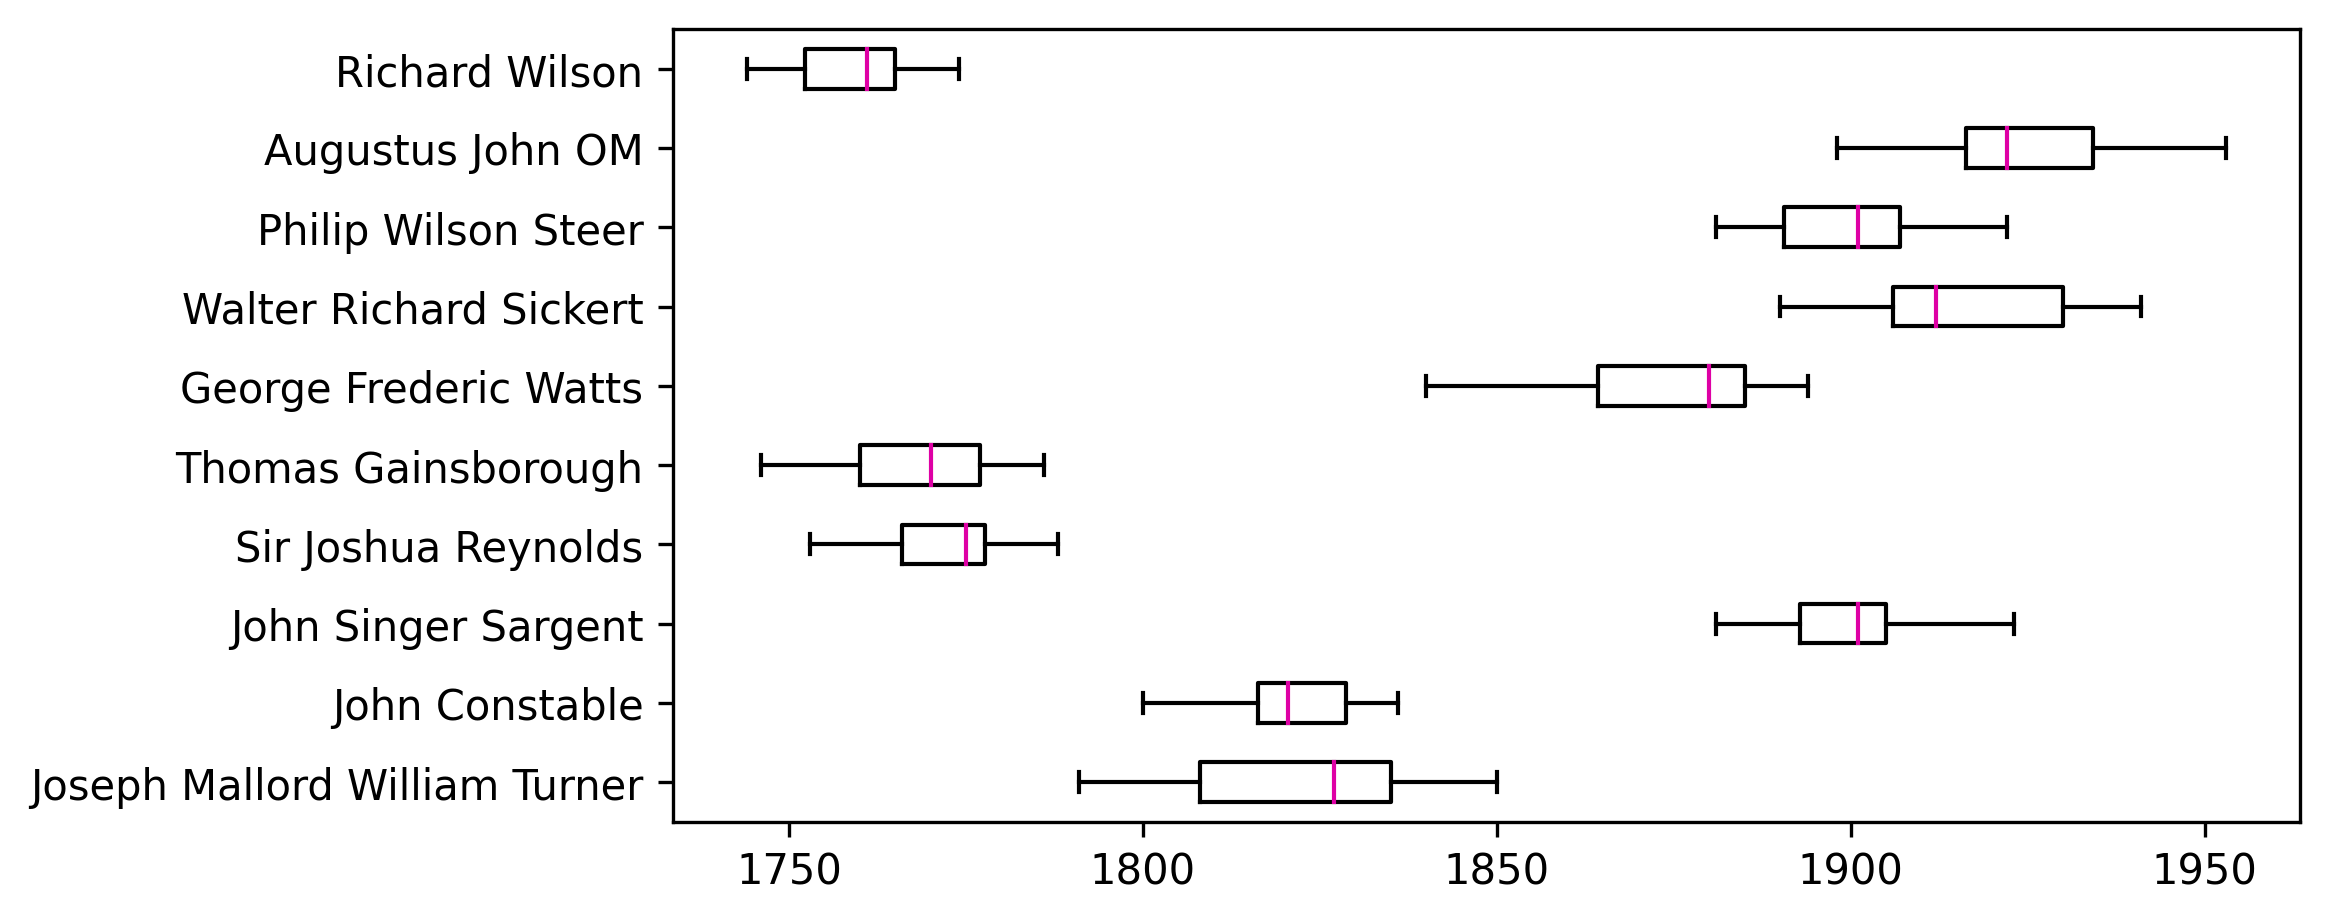

In [11]:
fig, ax = plt.subplots(dpi=300, figsize=(7,3.5))

dists = []
for artist in counts.index:
    dists.append(collection[collection['artist'] == artist]['year'])
ax.boxplot(dists, vert=False, labels=counts.index)
pass

/usr/local/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  func(*args, **kwargs)
/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


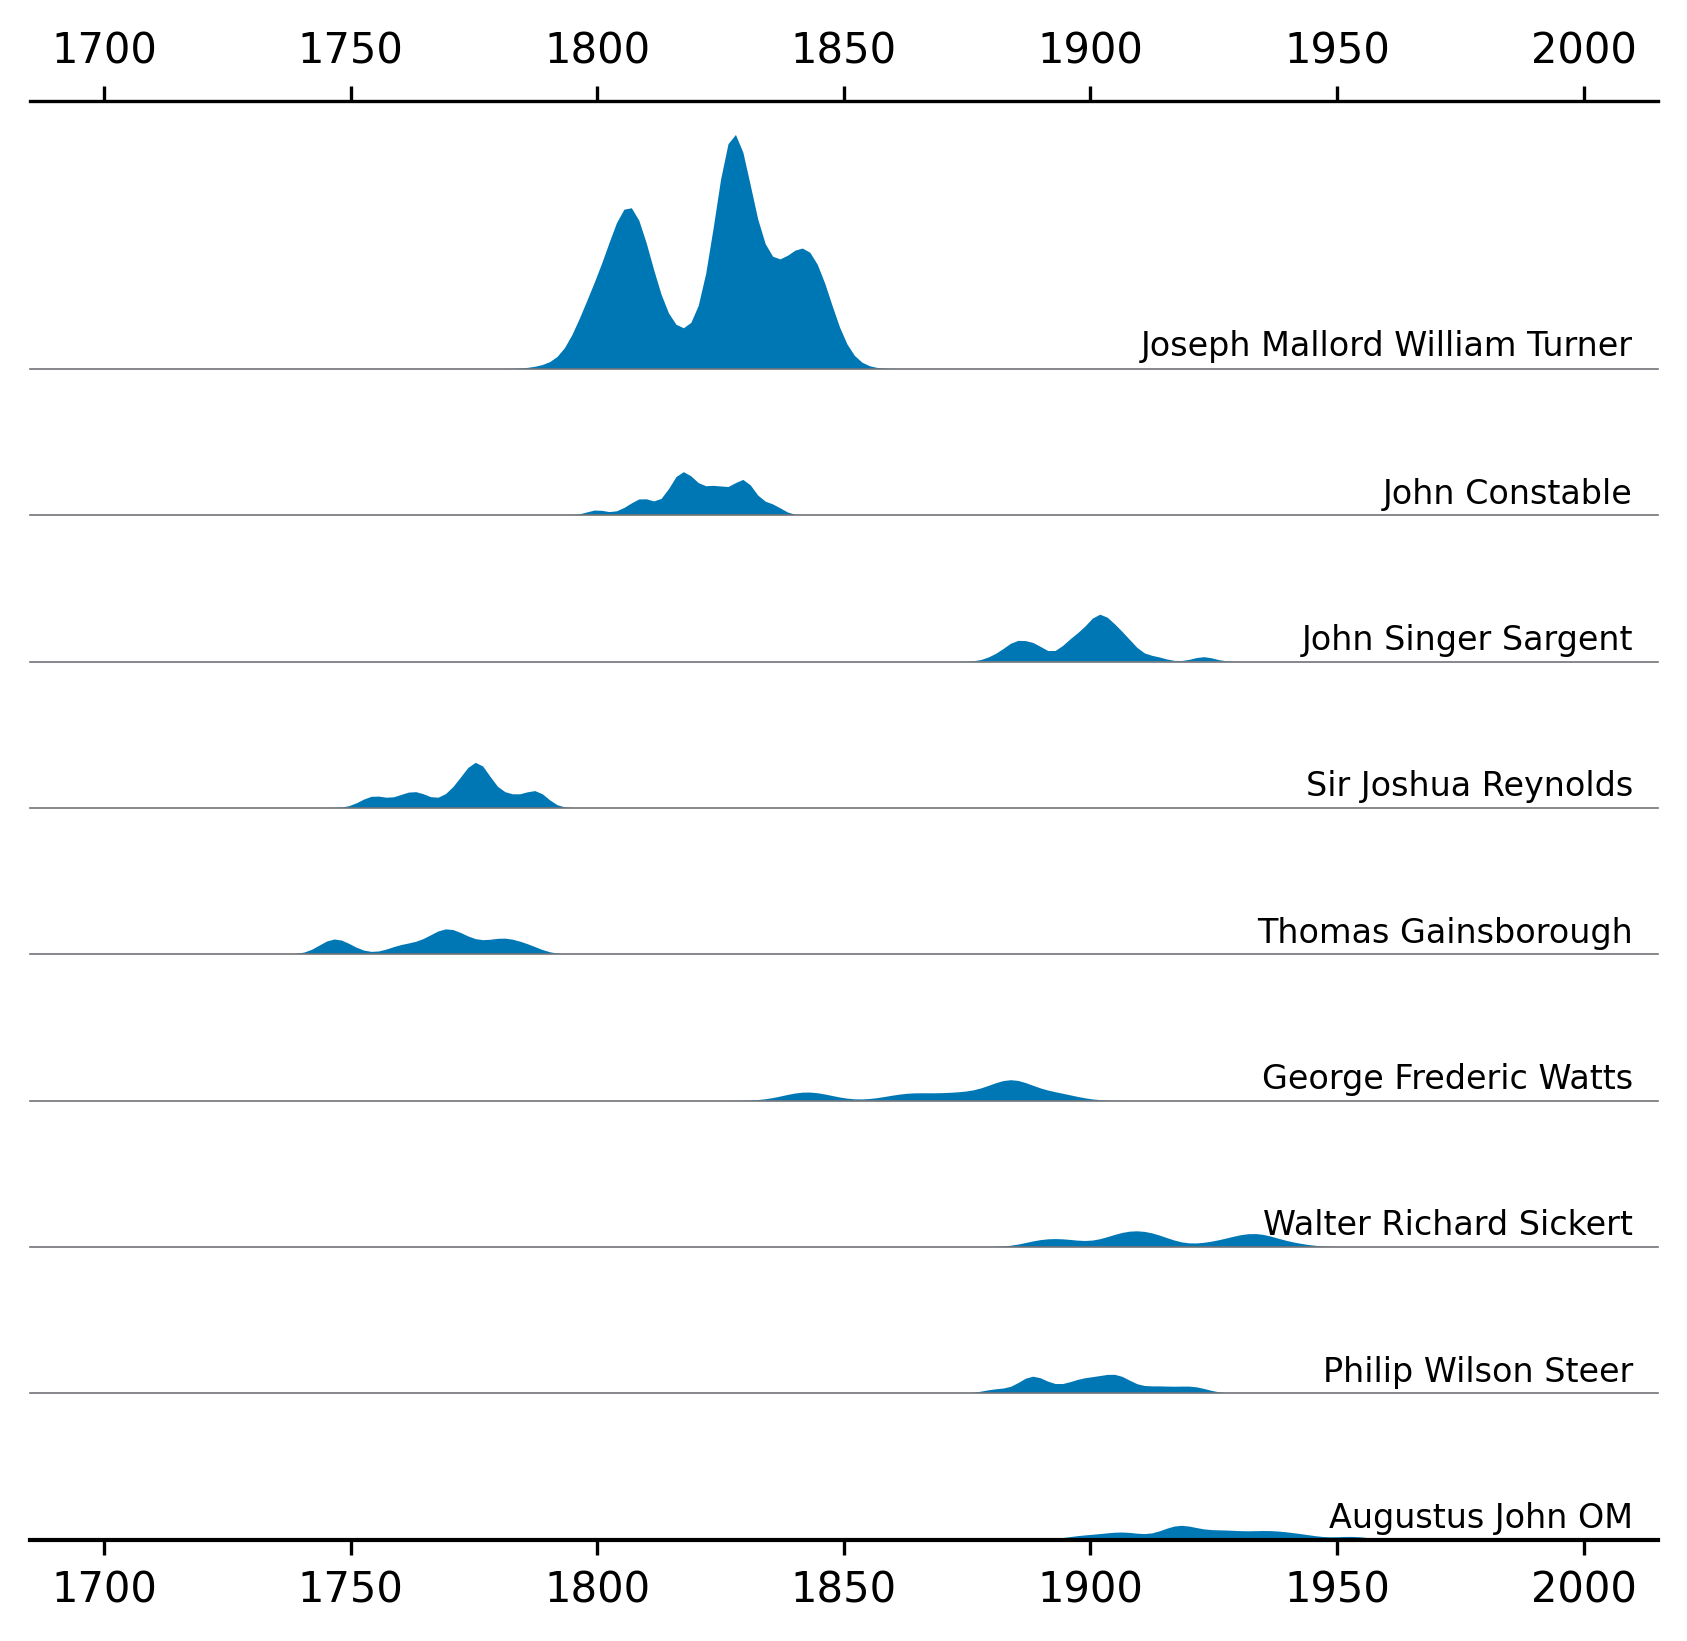

In [12]:
from scipy.stats import gaussian_kde

counts = collection['artist'].value_counts()
counts = counts[:10] # Select ten values with highest counts
counts

fig = plt.figure(constrained_layout=True, dpi=300, figsize=(7,7))
gs = fig.add_gridspec(ncols=1, nrows=len(counts)+1)

axes = []
axes.append(fig.add_subplot(gs[0:2, 0]))
for i in range(2, len(counts)):
    axes.append(fig.add_subplot(gs[i, 0]))
    
xs = np.linspace(1700,2000,200)    
for ax, artist in zip(axes, counts.index):
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(colors['gray'])
    ax.spines['bottom'].set_linewidth(0.4)
    
    ds = collection[collection['artist'] == artist]['year']
    start = (ds.min() // 5)*5
    end = (ds.max() // 5)*5 + 10

    density = gaussian_kde(ds)
    density.covariance_factor = lambda : .23
    density._compute_covariance()
    scale = len(ds)
    ax.fill_between(xs, 0, density(xs)  * scale )
    
    ax.text(2010, 0.5, artist, fontsize=8, ha='right')
    
    ax.set_ylim(0, 5)
    ax.tick_params(axis='x', which='major', bottom=False, labelbottom=False)
    ax.tick_params(axis='y', which='major', left=False, labelleft=False)

    
axes[0].set_ylim(0, 10)
axes[0].spines['top'].set_visible(True)
axes[0].tick_params(axis='x', which='major', top=True, labeltop=True)
axes[-1].tick_params(axis='x', which='major', bottom=True, labelbottom=True)
axes[-1].spines['bottom'].set_color('black')
axes[-1].spines['bottom'].set_linewidth(1)
    

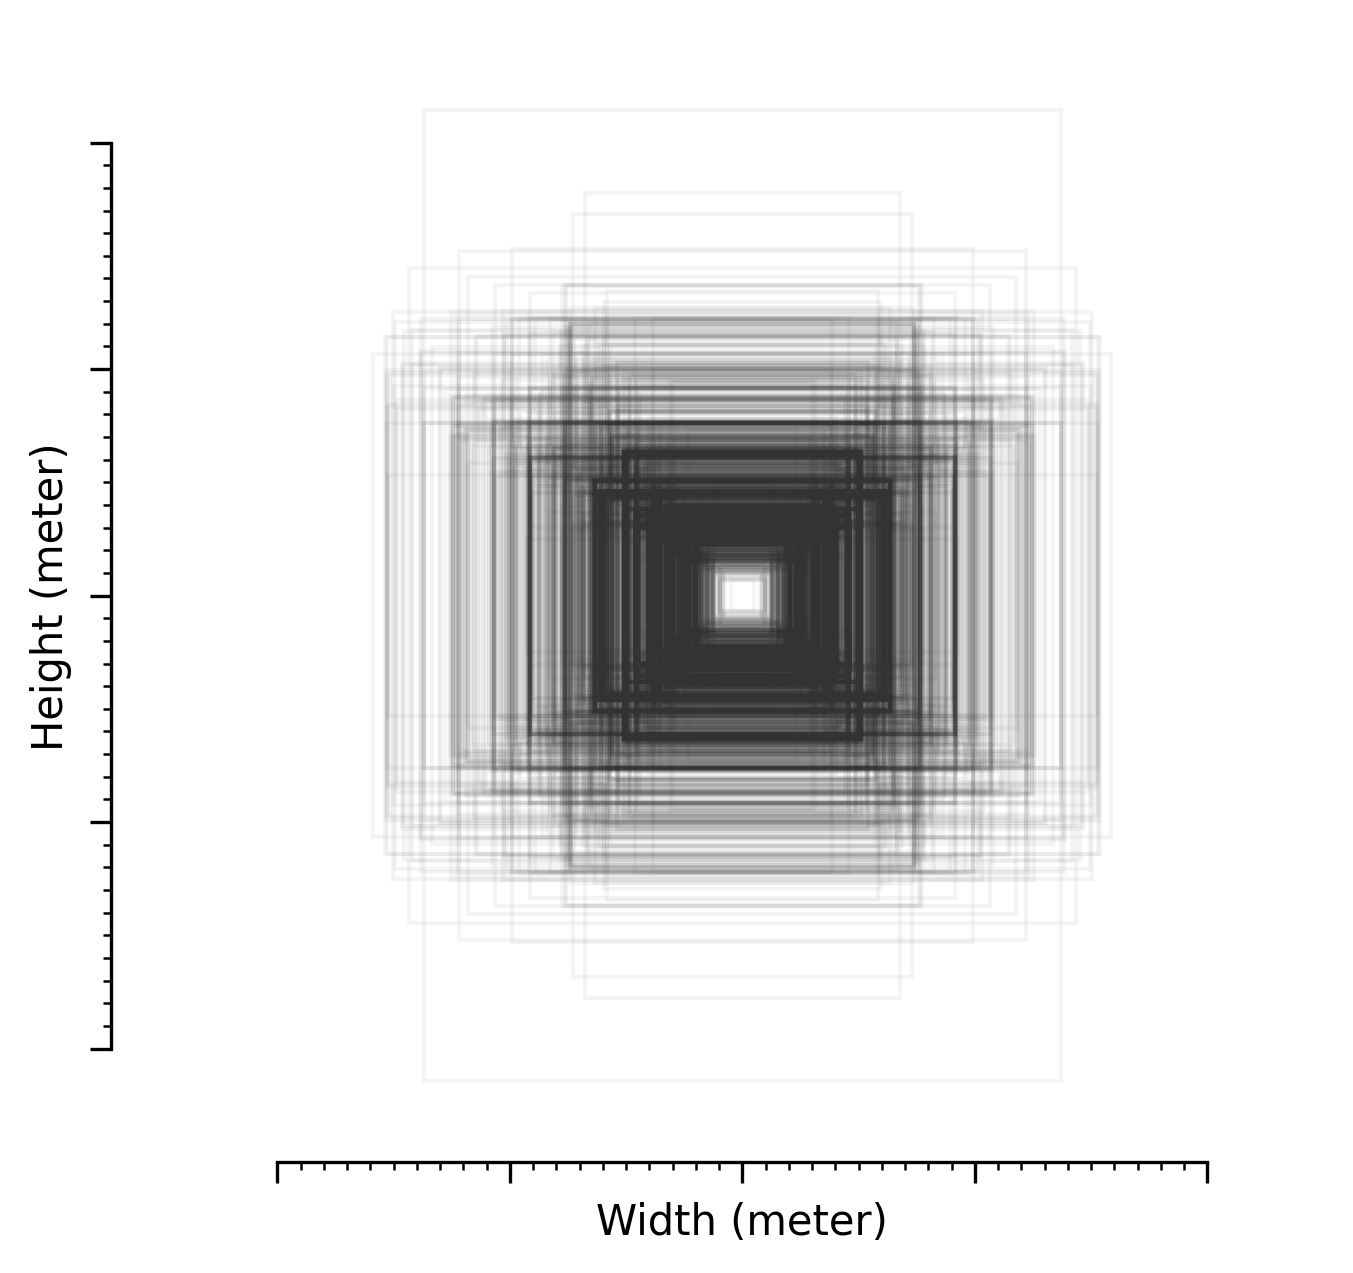

In [13]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(dpi=300, figsize=(5,5))
xs = collection['width'] / 10
ys = collection['height'] / 10

for w, h in zip(xs, ys):
    # Bottom left coordinates, width, height
    if w > 320:
        continue
    rect = Rectangle((-w/2, -h/2), w, h, fill=False, alpha=0.05, lw=1, ec='#333333')
    ax.add_patch(rect)

ax.set_xlim(-250, 250)
ax.set_ylim(-250, 250)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    
ax.spines['left'].set_bounds(-200, 200)
ax.spines['left'].set_position(('outward', 12))
ax.spines['bottom'].set_bounds(-200, 200)

ax.set_xticks(range(-200, 201, 100))
ax.set_xticks(range(-200, 201, 10), minor=True)

ax.set_yticks(range(-200, 201, 100))
ax.set_yticks(range(-200, 201, 10), minor=True)

ax.tick_params(axis='both', labelleft=False, labelbottom=False)
ax.tick_params(axis='both', which='minor', length=2)
ax.tick_params(axis='both', which='major', length=5)

ax.set_xlabel("Width (meter)")
ax.set_ylabel("Height (meter)")

pass
# ax.scatter(xs, ys, marker='+', s=10, lw=.5)

# ax.set_xlabel('Width (cm)')
# ax.set_ylabel('Height (cm)')

### OLD STUFF 

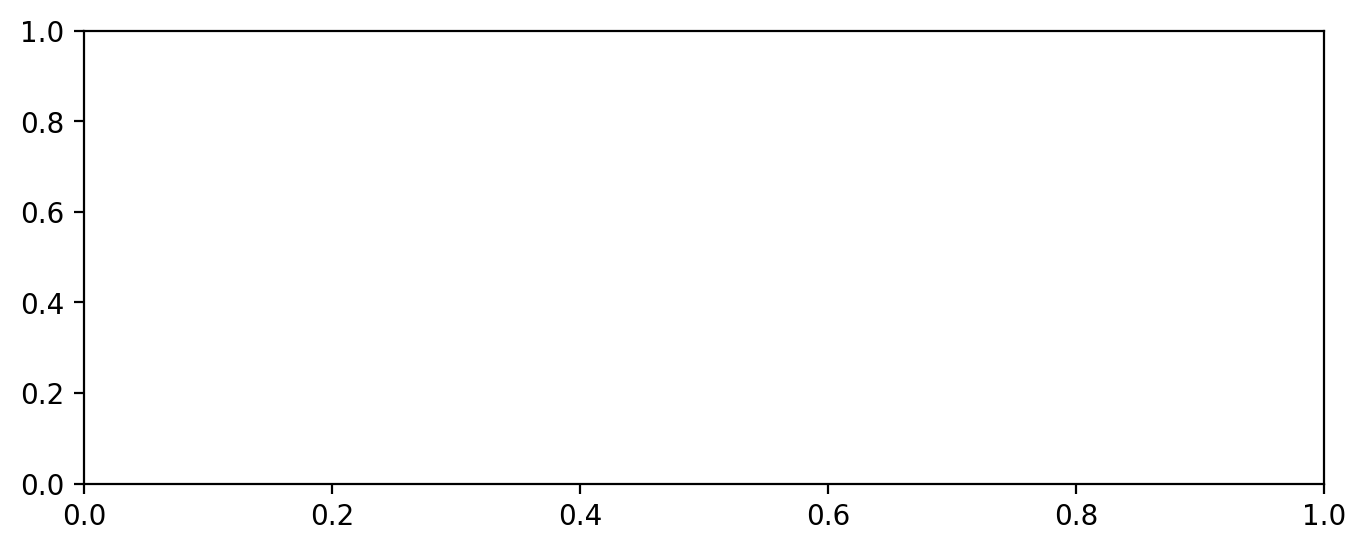

In [14]:
fig, ax = plt.subplots(dpi=200, figsize=(8,3))

Once we have the axes object `ax` we can use `.scatter()` to draw datapoints with given x and y values. Instead of accepting pairs of coordinates (x,y), most methods in matplotlib need one list with all x-values and one list with all y-values. 

Plotting points [(0, 0), (1, 1), (2, 4), (3, 9), (4, 16)]


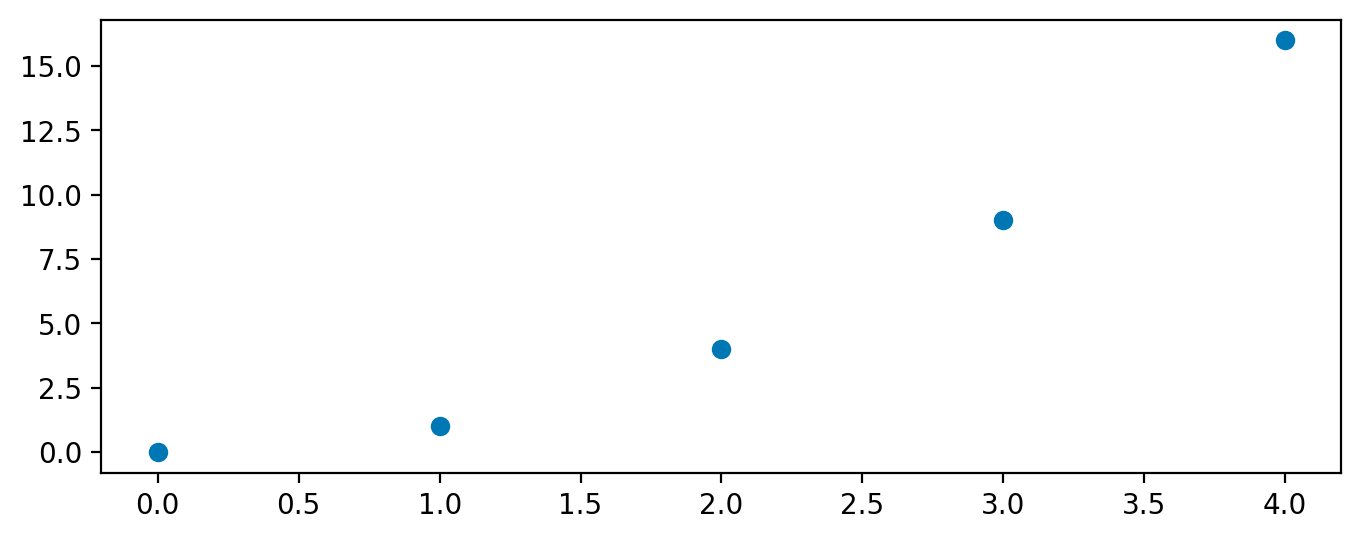

In [15]:
xs = [0, 1, 2, 3, 4]  # x values
ys = [0, 1, 4, 9, 16] # y values

print("Plotting points", list(zip(xs,ys)))

fig, ax = plt.subplots(dpi=200, figsize=(8,3))
ax.scatter(xs, ys)

pass 

We can draw more than one plot for each axes, even of different types. The following first uses `.scatter()` to draw individual points and then `.plot()` to draw a sequence of lines that connect those point. 

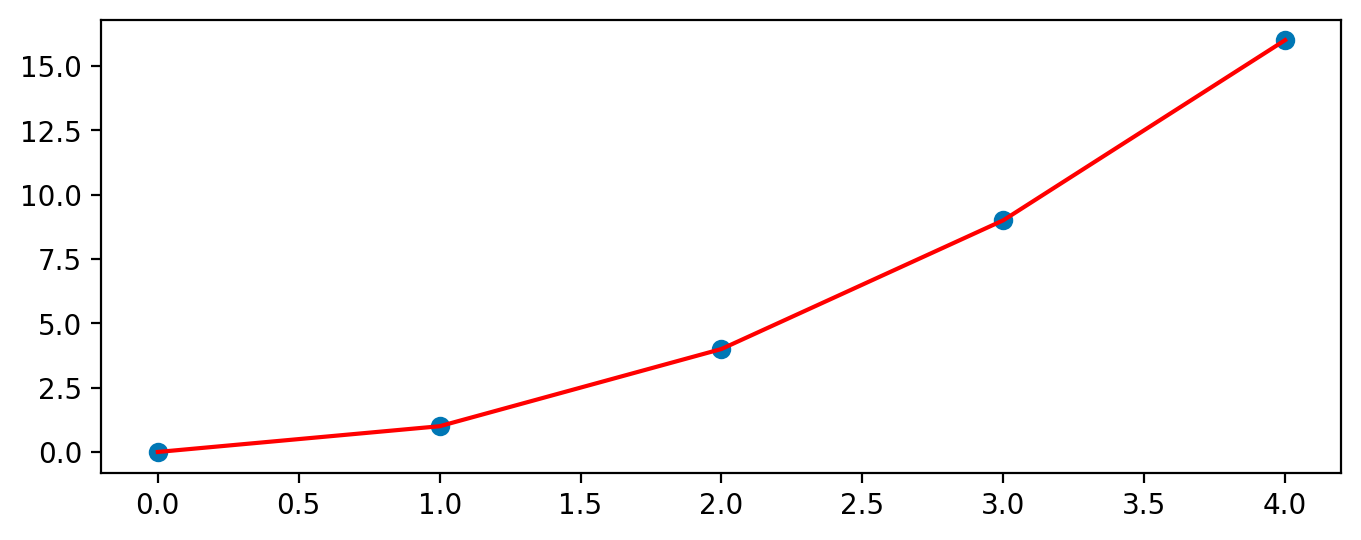

In [16]:
xs = [0, 1, 2, 3, 4]  # x values
ys = [0, 1, 4, 9, 16] # y values

fig, ax = plt.subplots(dpi=200, figsize=(8,3))
ax.scatter(xs, ys)
ax.plot(xs, ys, color='red') 

pass 

Note that in the cell above we passed a <b>named parameter</b> to `ax.plot(...)`. Python methods usually take a number of positional parameters where the order determines which parameter stand for what. However, this can get very cumbersome if we work with methods that have a lot of parameters. <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html">According to the documentation of `ax.plot(...)`</a>, it can take up 40 parameters! To deal with this complexity, we can pass most of these parameters by name, meaning we write something like `ax.plot(xs, <name>=<value>)` where `<name>` is the name of the parameter and `<value>` the value we want to assign to it. In the example above, the parameter name is `color` and we assign the value `"red"` to it, which tells Matplotlib that we would like to draw the line plot in red.

Drawing a complete plot then looks something like this: we create a figure/axes object, we use the axes object to plot our data and then we add annotations like a legend and axes labels. This all happens in the following cell:

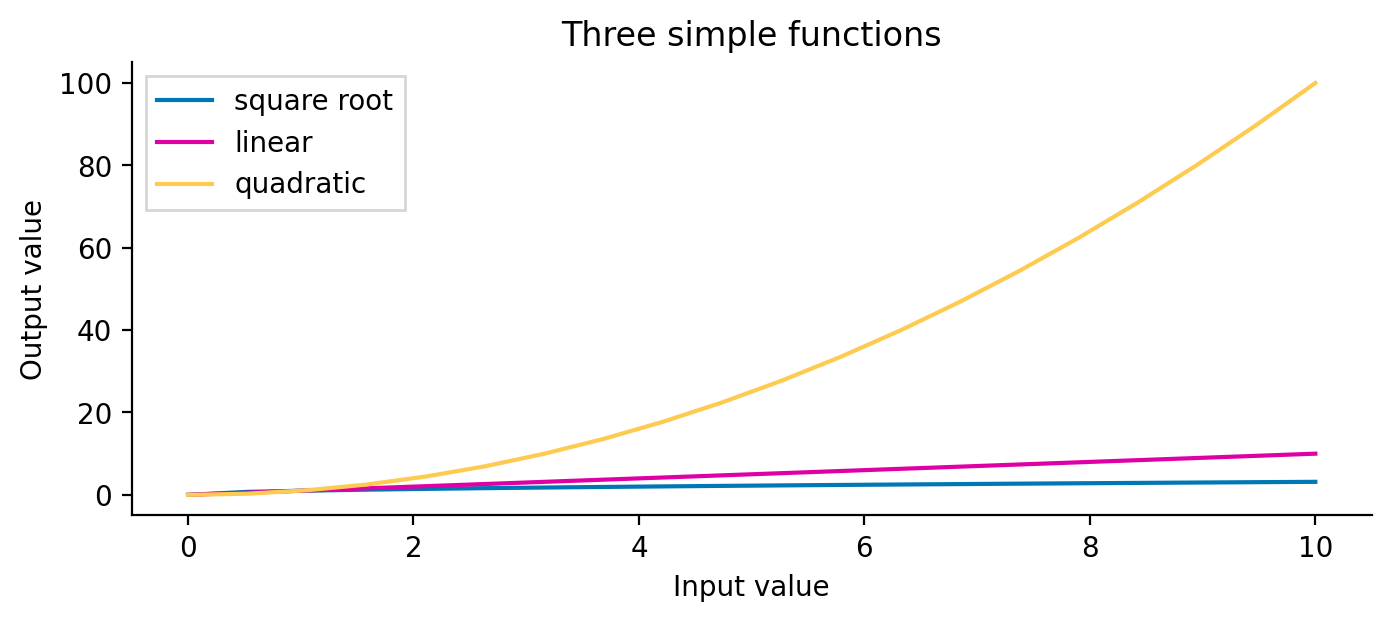

In [17]:
# Create values. This uses some numpy magic which we haven't 
# discussed yet.
xs = np.linspace(0, 10, 20)   # x-values from 0 to 10
ys_root = xs**.5 
ys_lin = 1*xs
ys_quad = xs**2

# Create figure, axes object
fig, ax = plt.subplots(dpi=200, figsize=(8,3))

# Plot functions
ax.plot(xs, ys_root, label='square root')
ax.plot(xs, ys_lin, label='linear')
ax.plot(xs, ys_quad, label='quadratic')

# Display legend
ax.legend()

ax.set_title('Three simple functions')
ax.set_xlabel('Input value')
ax.set_ylabel('Output value')

# Remove right and top spine. This is just personal preference!
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

pass 

<h3>Back to histograms</h3>

Histograms in matplotlib are available via the `ax.hist(...)` method. The first argument
`ax.hist(...)` takes is the data we want to plot. The following cell will generate some data
which we can use to test this out. Run the following cell, it should output how many values it
generated.

In [18]:
# Generate data with values between 1 and 10.
np.random.seed(42) 
xs = np.random.normal(5, 3, size=1000)
print(len(xs))

1000


We can now pass `xs` to `ax.hist(...)`. 

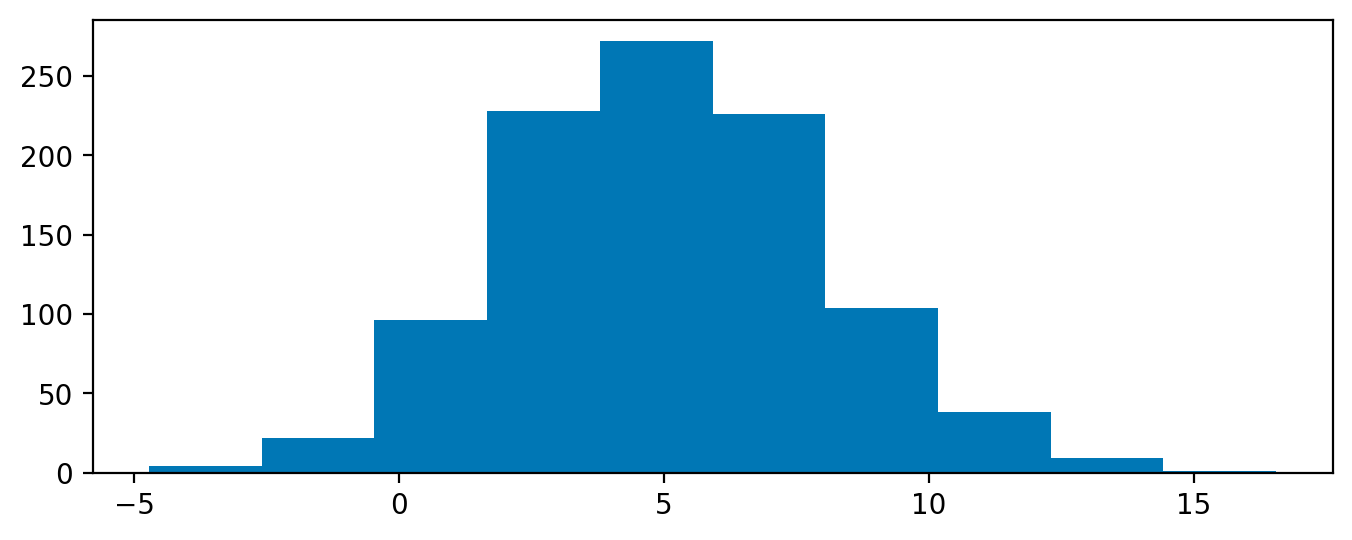

In [19]:
fig, ax = plt.subplots(dpi=200, figsize=(8,3))
ax.hist(xs)
pass 

Note how we did not specifiy the bin-width we would like to have&mdash;Matplotlib automatically chooses a reasonable value for us. However, we might want to adjust the granularity of the plot. To that end, `.hist(...)` accepts the named parameter `bins` which sets the <i>number</i> of bins (and so implicitly also the bin width). For example, we can repeat the above plot but this time with 50 bins as follows:

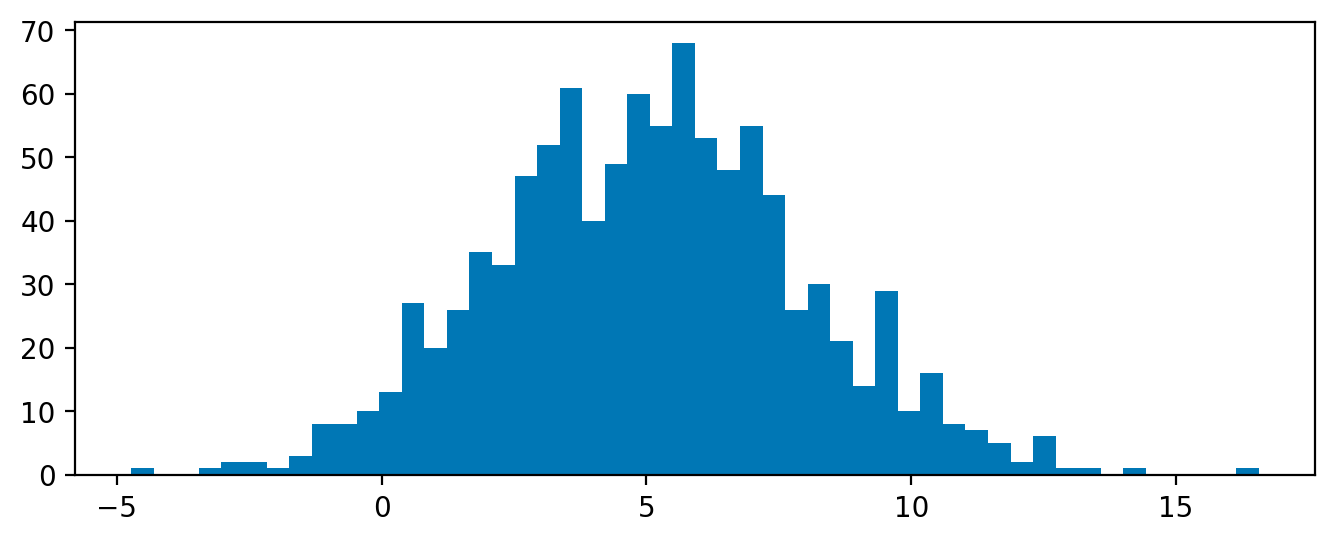

In [20]:
# Plot the data
fig, ax = plt.subplots(dpi=200, figsize=(8,3))
ax.hist(xs, bins=50)

pass 

<div class="task">
    <div class="no">2</div>
    <div class="text">Use Matplotlib to plot 
        a histogram of the &lsquo;width&rsquo; column in
        the <code>collection</code> DataFrame using
        the cell below. Choose an approprioate values for the parameter <code>bins=...</code>. Don't forget to add axes labels to the plot!
    </div>
</div>

<ol class="hints">
    <li><p>
        Recall that you can access the &lsquo;width&rsquo; column using <code>collection['width']</code>.
     </p></li>
</ol>

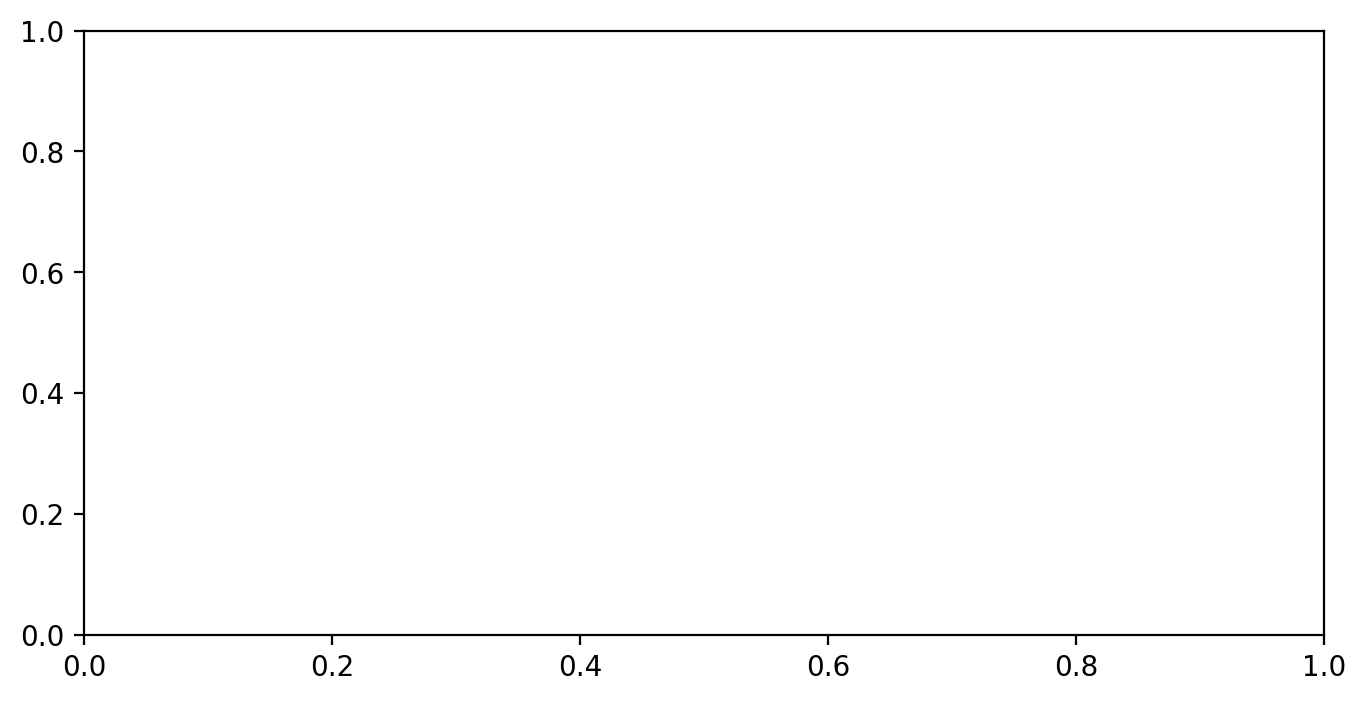

In [21]:
# Create figure, axes object
fig, ax = plt.subplots(dpi=200, figsize=(8,4))

# -------------------------------------------------
# Delete these lines and write your own code here!
# -------------------------------------------------

pass 